In [1]:
#Loading in necessary libraries for later use
import os
import numpy as np
from pandas import DataFrame
import datetime as datetime
from datetime import datetime
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

#Loading in the eReefs data as a CSV file (original file saved in the workspace)
#Removed any null values from the data
df= pd.read_csv('Baseline Present all variable .csv', na_values=[99999.9],
               parse_dates=['Aggregated Date/Time'])

In [2]:
#Setting the index as the date/time values and loading the top of the data to check the layout
df= df.set_index('Aggregated Date/Time')
df.head()

,Variable,Depth,Site Name,Latitude,Longitude,mean,median,p5,p95,lowest,highest
Aggregated Date/Time,,,,,,,,,,,
2019-04-30,Mud-mineral,-3.0,Present,-19.823026,147.752641,0.001310,0.001310,0.001310,0.001310,0.001310,0.001310
2019-04-30,NO3,-3.0,Present,-19.823026,147.752641,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001
2019-04-30,PH,-3.0,Present,-19.823026,147.752641,8.075751,8.075751,8.075751,8.075751,8.075751,8.075751
2019-04-30,Secchi,NaN,Present,-19.823026,147.752641,3.755115,3.755115,3.755115,3.755115,3.755115,3.755115
2019-04-30,Chl_a_sum,-3.0,Present,-19.823026,147.752641,0.353379,0.353379,0.353379,0.353379,0.353379,0.353379


In [12]:
#rearranging the columns to ensure the variables are listed as columns instead of rows

data = pd.read_csv(r'./Baseline Present all variable .csv',parse_dates=['Aggregated Date/Time'])
df = data.drop(columns=['median', 'p5', 'p95', 'lowest','highest','Depth']).rename(columns={"mean": "value"})

df = (df.set_index(["Site Name", "Latitude", "Longitude", "Aggregated Date/Time"])
    .pivot(columns="Variable")['value'].reset_index()
        .rename_axis(None, axis=1))
df = df.drop(columns=['Site Name', 'Latitude', 'Longitude'])
df = df.rename(columns={"Aggregated Date/Time": "Time"})
df['Time']= pd.to_datetime(df['Time'])
df = df.replace('no data', 0).reset_index(drop=True)
df.head()

,Time,Chl_a_sum,DIC,DIN,DIP,Dust,EpiPAR_sg,Mud-carbonate,Mud-mineral,NH4,NO3,Oxygen,PH,SGH_N,Secchi
0,2010-12-01,0.000000,23363.32813,0.000000,2.156009,0.000132,0.000000,0.000250,0.001303,1.402584,0.686144,6417.374023,8.000000,0.047600,0.000000
1,2010-12-02,0.437408,23419.84961,2.062643,2.241509,0.000127,21.260040,0.000219,0.001141,0.001957,2.060686,6829.874512,8.190508,0.049439,2.455725
2,2010-12-03,0.514894,23442.04883,6.091313,3.010972,0.000291,10.864405,0.000261,0.001359,1.583683,4.507630,6862.306152,8.165360,0.050933,2.686922
3,2010-12-04,0.534711,23207.39844,11.915860,4.273349,0.000936,21.665079,0.000296,0.001543,1.694177,10.221683,6923.639648,8.145284,0.054706,2.506904
4,2010-12-05,0.620978,22610.88672,21.111147,6.548059,0.002720,7.515489,0.000255,0.001329,3.030101,18.081047,6883.373535,8.130607,0.056430,1.733231


In [14]:
#Setting the index as the date/time column
#displaying the top of the data to check layout

df= df.set_index('Time')
df.head()


,Chl_a_sum,DIC,DIN,DIP,Dust,EpiPAR_sg,Mud-carbonate,Mud-mineral,NH4,NO3,Oxygen,PH,SGH_N,Secchi
Time,,,,,,,,,,,,,,
2010-12-01,0.000000,23363.32813,0.000000,2.156009,0.000132,0.000000,0.000250,0.001303,1.402584,0.686144,6417.374023,8.000000,0.047600,0.000000
2010-12-02,0.437408,23419.84961,2.062643,2.241509,0.000127,21.260040,0.000219,0.001141,0.001957,2.060686,6829.874512,8.190508,0.049439,2.455725
2010-12-03,0.514894,23442.04883,6.091313,3.010972,0.000291,10.864405,0.000261,0.001359,1.583683,4.507630,6862.306152,8.165360,0.050933,2.686922
2010-12-04,0.534711,23207.39844,11.915860,4.273349,0.000936,21.665079,0.000296,0.001543,1.694177,10.221683,6923.639648,8.145284,0.054706,2.506904
2010-12-05,0.620978,22610.88672,21.111147,6.548059,0.002720,7.515489,0.000255,0.001329,3.030101,18.081047,6883.373535,8.130607,0.056430,1.733231


In [15]:
#Creating a total suspended solids column (mud carbonate + mud mineral + dust= total suspended solids)
#Added the new 'total suspended solids' column to the data frame
#displayed top of data to ensure it joined correctly

sum_column = df['Mud-carbonate'] + df['Mud-mineral'] + df['Dust']
df['Total suspended solids'] = sum_column
df.head()

,Chl_a_sum,DIC,DIN,DIP,Dust,EpiPAR_sg,Mud-carbonate,Mud-mineral,NH4,NO3,Oxygen,PH,SGH_N,Secchi,Total suspended solids
Time,,,,,,,,,,,,,,,
2010-12-01,0.000000,23363.32813,0.000000,2.156009,0.000132,0.000000,0.000250,0.001303,1.402584,0.686144,6417.374023,8.000000,0.047600,0.000000,0.001685
2010-12-02,0.437408,23419.84961,2.062643,2.241509,0.000127,21.260040,0.000219,0.001141,0.001957,2.060686,6829.874512,8.190508,0.049439,2.455725,0.001487
2010-12-03,0.514894,23442.04883,6.091313,3.010972,0.000291,10.864405,0.000261,0.001359,1.583683,4.507630,6862.306152,8.165360,0.050933,2.686922,0.001911
2010-12-04,0.534711,23207.39844,11.915860,4.273349,0.000936,21.665079,0.000296,0.001543,1.694177,10.221683,6923.639648,8.145284,0.054706,2.506904,0.002775
2010-12-05,0.620978,22610.88672,21.111147,6.548059,0.002720,7.515489,0.000255,0.001329,3.030101,18.081047,6883.373535,8.130607,0.056430,1.733231,0.004304


In [16]:
#Loading in the eReefs hydrodynamic data as a csv (file found in the workspace)

hydrodf= pd.read_csv('Hydrodynamic data.csv', na_values=[99999.9],
               parse_dates=['Aggregated Date/Time'])
hydrodf.head()

,Aggregated Date/Time,Variable,Depth,Site Name,Latitude,Longitude,mean,median,p5,p95,lowest,highest
0,2010-09-01,salt,-3.0,Present,-19.823026,147.752641,34.982983,34.981461,34.974201,34.997768,34.973175,34.997768
1,2010-09-01,temp,-3.0,Present,-19.823026,147.752641,23.454656,23.465986,22.995075,23.921850,22.987171,23.921850
2,2010-09-01,wspeed_u,NaN,Present,-19.823026,147.752641,-3.780118,-3.829338,-5.786279,-1.590500,-5.986465,-1.590500
3,2010-09-01,wspeed_v,NaN,Present,-19.823026,147.752641,0.382929,0.270031,-1.502250,2.769317,-1.651407,2.769317
4,2010-09-01,u,-3.0,Present,-19.823026,147.752641,-0.006277,-0.007286,-0.153516,0.206805,-0.173458,0.206805


In [17]:
#rearranging the columns to ensure the variables are listed as columns instead of rows

hydrodata = pd.read_csv(r'./Hydrodynamic data.csv',parse_dates=['Aggregated Date/Time'])
hydrodf = hydrodata.drop(columns=['median', 'p5', 'p95', 'lowest','highest','Depth']).rename(columns={"mean": "value"})

hydrodf = (hydrodf.set_index(["Site Name", "Latitude", "Longitude", "Aggregated Date/Time"])
    .pivot(columns="Variable")['value'].reset_index()
        .rename_axis(None, axis=1))
hydrodf = hydrodf.drop(columns=['Site Name', 'Latitude', 'Longitude'])
hydrodf = hydrodf.rename(columns={"Aggregated Date/Time": "Time"})
hydrodf['Time']= pd.to_datetime(hydrodf['Time'])
hydrodf = hydrodf.replace('no data', 0).reset_index(drop=True)
hydrodf.head()

,Time,eta,salt,temp,u,v,wspeed_u,wspeed_v
0,2010-09-01,0.155841,34.982983,23.454656,-0.006277,0.005307,-3.780118,0.382929
1,2010-09-02,0.111844,35.005727,23.809889,-0.006717,0.005678,-2.224748,0.159566
2,2010-09-03,0.059620,35.024286,24.401832,0.000669,-0.000566,-3.079495,0.377584
3,2010-09-04,0.069070,35.034885,24.721023,0.000712,-0.000602,-3.712378,-0.792969
4,2010-09-05,0.007698,35.035007,25.022102,0.000548,-0.000463,-2.389743,-1.064295


In [18]:
hydrodf=hydrodf.set_index('Time')
hydrodf.head()

,eta,salt,temp,u,v,wspeed_u,wspeed_v
Time,,,,,,,
2010-09-01,0.155841,34.982983,23.454656,-0.006277,0.005307,-3.780118,0.382929
2010-09-02,0.111844,35.005727,23.809889,-0.006717,0.005678,-2.224748,0.159566
2010-09-03,0.059620,35.024286,24.401832,0.000669,-0.000566,-3.079495,0.377584
2010-09-04,0.069070,35.034885,24.721023,0.000712,-0.000602,-3.712378,-0.792969
2010-09-05,0.007698,35.035007,25.022102,0.000548,-0.000463,-2.389743,-1.064295


In [21]:
#Joining the two data sources together in one data frame (including the added 'total suspended solids' column)
#Here is the full list of vaiables -"Chl_a_sum", "DIC","DIN","DIP","EpiPAR_sg","NH4","NO3","SGH_N","Secchi", "Oxygen","PH","Total suspended solids","salt","temp"
#Displaying the top of the data to check the layout is correct

dffull = df.join(hydrodf)
dffull.head()

,Chl_a_sum,DIC,DIN,DIP,Dust,EpiPAR_sg,Mud-carbonate,Mud-mineral,NH4,NO3,...,SGH_N,Secchi,Total suspended solids,eta,salt,temp,u,v,wspeed_u,wspeed_v
Time,,,,,,,,,,,,,,,,,,,,,
2010-12-01,0.000000,23363.32813,0.000000,2.156009,0.000132,0.000000,0.000250,0.001303,1.402584,0.686144,...,0.047600,0.000000,0.001685,0.147308,24.978277,27.857509,0.002416,-0.002042,-2.671114,1.173469
2010-12-02,0.437408,23419.84961,2.062643,2.241509,0.000127,21.260040,0.000219,0.001141,0.001957,2.060686,...,0.049439,2.455725,0.001487,0.141110,25.672827,28.107565,0.003155,-0.002667,-2.971156,0.983908
2010-12-03,0.514894,23442.04883,6.091313,3.010972,0.000291,10.864405,0.000261,0.001359,1.583683,4.507630,...,0.050933,2.686922,0.001911,0.120307,26.349494,27.970265,0.000545,-0.000461,-0.810975,-0.057024
2010-12-04,0.534711,23207.39844,11.915860,4.273349,0.000936,21.665079,0.000296,0.001543,1.694177,10.221683,...,0.054706,2.506904,0.002775,0.073807,26.416924,28.102003,-0.003439,0.002907,-0.896874,-0.828629
2010-12-05,0.620978,22610.88672,21.111147,6.548059,0.002720,7.515489,0.000255,0.001329,3.030101,18.081047,...,0.056430,1.733231,0.004304,0.025818,25.419795,28.496219,-0.005082,0.004296,-0.678250,-1.254023


In [22]:
#Removed unneeded/replicate variables (This was done based on the correlation matrices)
#Take the variables out to this list if they dont have a significant enough interaction

dffinal= dffull [["DIN","NO3","SGH_N","Oxygen","PH"]]
dffinal.head()

,DIN,NO3,SGH_N,Oxygen,PH
Time,,,,,
2010-12-01,0.000000,0.686144,0.047600,6417.374023,8.000000
2010-12-02,2.062643,2.060686,0.049439,6829.874512,8.190508
2010-12-03,6.091313,4.507630,0.050933,6862.306152,8.165360
2010-12-04,11.915860,10.221683,0.054706,6923.639648,8.145284
2010-12-05,21.111147,18.081047,0.056430,6883.373535,8.130607


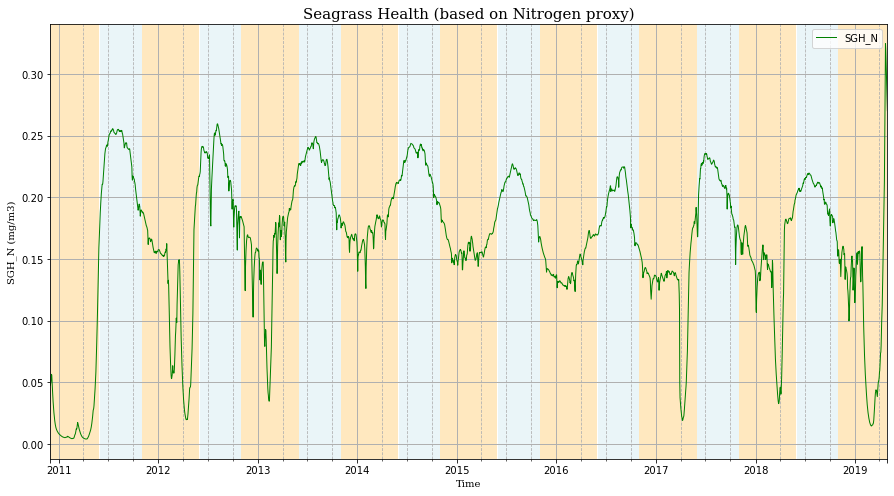

In [34]:
#preliminary plot of seagrass health (SGH_N)
#######################change arial to whatever font we use in the report
fig=dffull.plot(y='SGH_N', figsize=(15,8),lw=1, c='g')
fig.set_ylabel('SGH_N (mg/m3)',size=10, family='serif')
fig.set_xlabel('Time',size=10, family='serif')
fig.set_title('Seagrass Health (based on Nitrogen proxy)',size=15, family='serif')
fig.grid(which='minor', linestyle='--')
fig.grid(which='major', linewidth=1)

#Summer stripes
fig.axvspan(datetime(2009, 11, 1), datetime(2010, 5, 30), facecolor='orange', alpha=0.25)
fig.axvspan(datetime(2010, 11, 1), datetime(2011, 5, 30), facecolor='orange', alpha=0.25)
fig.axvspan(datetime(2011, 11, 1), datetime(2012, 5, 30), facecolor='orange', alpha=0.25)
fig.axvspan(datetime(2012, 11, 1), datetime(2013, 5, 30), facecolor='orange', alpha=0.25)
fig.axvspan(datetime(2013, 11, 1), datetime(2014, 5, 30), facecolor='orange', alpha=0.25)
fig.axvspan(datetime(2014, 11, 1), datetime(2015, 5, 30), facecolor='orange', alpha=0.25)
fig.axvspan(datetime(2015, 11, 1), datetime(2016, 5, 30), facecolor='orange', alpha=0.25)
fig.axvspan(datetime(2016, 11, 1), datetime(2017, 5, 30), facecolor='orange', alpha=0.25)
fig.axvspan(datetime(2017, 11, 1), datetime(2018, 5, 30), facecolor='orange', alpha=0.25)
fig.axvspan(datetime(2018, 11, 1), datetime(2019, 5, 30), facecolor='orange', alpha=0.25)
fig.axvspan(datetime(2019, 11, 1), datetime(2020, 5, 30), facecolor='orange', alpha=0.25)

#winter stripes
fig.axvspan(datetime(2010, 6, 1), datetime(2010, 10, 1), facecolor='lightblue', alpha=0.25)
fig.axvspan(datetime(2011, 6, 1), datetime(2011, 11, 1), facecolor='lightblue', alpha=0.25)
fig.axvspan(datetime(2012, 6, 1), datetime(2012, 11, 1), facecolor='lightblue', alpha=0.25)
fig.axvspan(datetime(2013, 6, 1), datetime(2013, 11, 1), facecolor='lightblue', alpha=0.25)
fig.axvspan(datetime(2014, 6, 1), datetime(2014, 11, 1), facecolor='lightblue', alpha=0.25)
fig.axvspan(datetime(2015, 6, 1), datetime(2015, 11, 1), facecolor='lightblue', alpha=0.25)
fig.axvspan(datetime(2016, 6, 1), datetime(2016, 11, 1), facecolor='lightblue', alpha=0.25)
fig.axvspan(datetime(2017, 6, 1), datetime(2017, 11, 1), facecolor='lightblue', alpha=0.25)
fig.axvspan(datetime(2018, 6, 1), datetime(2018, 11, 1), facecolor='lightblue', alpha=0.25)
fig.axvspan(datetime(2019, 6, 1), datetime(2019, 11, 1), facecolor='lightblue', alpha=0.25)

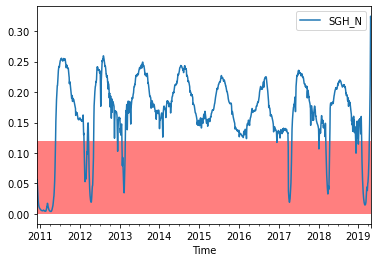

In [37]:
#storm events highlighted (events falling in the red zone are extreme events)

dffull.plot(y='SGH_N')

for i in range(0, 1):
    plt.axhspan(i, i+.12, facecolor='r', alpha=0.5)
    

plt.show()

In [42]:
#Loading in the eReefs absent site data as a CSV file (original file saved in the workspace)
#Removed any null values from the data

absentdf= pd.read_csv('Absent seagrass site.csv', na_values=[99999.9],
               parse_dates=['Aggregated Date/Time'])

absentdf.head()


,Aggregated Date/Time,Variable,Depth,Site Name,Latitude,Longitude,mean,median,p5,p95,lowest,highest
0,2010-12-01,SGH_N,NaN,Absent,-19.428066,147.488939,0.047600,0.047600,0.047600,0.047600,0.047600,0.047600
1,2010-12-02,SGH_N,NaN,Absent,-19.428066,147.488939,0.044572,0.044572,0.044572,0.044572,0.044572,0.044572
2,2010-12-03,SGH_N,NaN,Absent,-19.428066,147.488939,0.040612,0.040612,0.040612,0.040612,0.040612,0.040612
3,2010-12-04,SGH_N,NaN,Absent,-19.428066,147.488939,0.037928,0.037928,0.037928,0.037928,0.037928,0.037928
4,2010-12-05,SGH_N,NaN,Absent,-19.428066,147.488939,0.038389,0.038389,0.038389,0.038389,0.038389,0.038389


In [45]:
#rearranging the columns to ensure the variables are listed as columns instead of rows\

absentdata = pd.read_csv(r'./Absent seagrass site.csv',parse_dates=['Aggregated Date/Time'])
absentdf = absentdata.drop(columns=['median', 'p5', 'p95', 'lowest','highest','Depth']).rename(columns={"mean": "value"})

absentdf = (absentdf.set_index(["Site Name", "Latitude", "Longitude", "Aggregated Date/Time"])
    .pivot(columns="Variable")['value'].reset_index()
        .rename_axis(None, axis=1))

absentdf = absentdf.drop(columns=['Site Name', 'Latitude', 'Longitude'])
absentdf = absentdf.rename(columns={"Aggregated Date/Time": "Time"})
absentdf['Time']= pd.to_datetime(absentdf['Time'])
absentdf = absentdf.replace('no data', 0).reset_index(drop=True)
absentdf.head()

,Time,SGH_N
0,2010-12-01,0.047600
1,2010-12-02,0.044572
2,2010-12-03,0.040612
3,2010-12-04,0.037928
4,2010-12-05,0.038389


In [47]:
#Setting time/date as the index
#Displaying the top of the data to check the layout

absentdf= absentdf.set_index('Time')
absentdf.head()

KeyError: "None of ['Time'] are in the columns"